In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import LabelEncoder

print('setup complete')

setup complete


In [4]:
df=pd.read_csv("C:/Users/amose/OneDrive/Desktop/Lucid College/Corporate Finance/healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
# removing the id

df=df.drop(labels='id', axis='columns')
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
# checking the data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [7]:
# cleaning / filling the NaN

mean=df.bmi.mean()
df.bmi.fillna(mean, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [8]:
label_encoder=LabelEncoder()

df['gender']= pd.get_dummies(df['gender'])
df['Residence_type']= pd.get_dummies(df['Residence_type'])
df['ever_married']= pd.get_dummies(df['ever_married'])
df['work_type']=label_encoder.fit_transform(df['work_type'])
df['smoking_status']=label_encoder.fit_transform(df['smoking_status'])

df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,0,2,0,228.69,36.600000,1,1
1,1,61.0,0,0,0,3,1,202.21,28.893237,2,1
2,0,80.0,0,1,0,2,1,105.92,32.500000,2,1
3,1,49.0,0,0,0,2,0,171.23,34.400000,3,1
4,1,79.0,1,0,0,3,1,174.12,24.000000,2,1


array([[<AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'hypertension'}>],
       [<AxesSubplot:title={'center':'heart_disease'}>,
        <AxesSubplot:title={'center':'ever_married'}>,
        <AxesSubplot:title={'center':'work_type'}>],
       [<AxesSubplot:title={'center':'Residence_type'}>,
        <AxesSubplot:title={'center':'avg_glucose_level'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'smoking_status'}>,
        <AxesSubplot:title={'center':'stroke'}>, <AxesSubplot:>]],
      dtype=object)

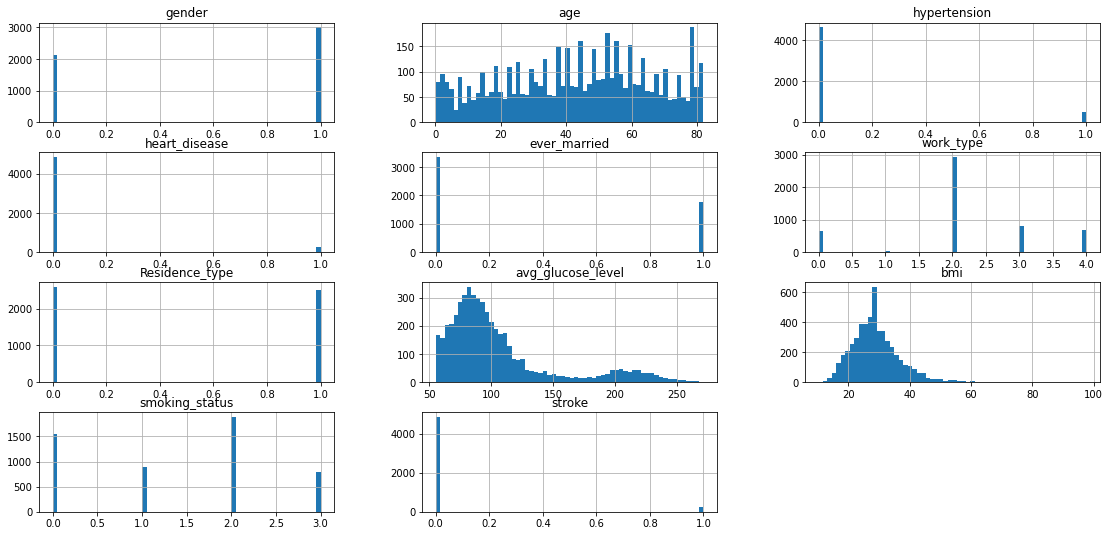

In [9]:
# histogram chart
df.hist(bins=60, figsize=(19,9))

<AxesSubplot:>

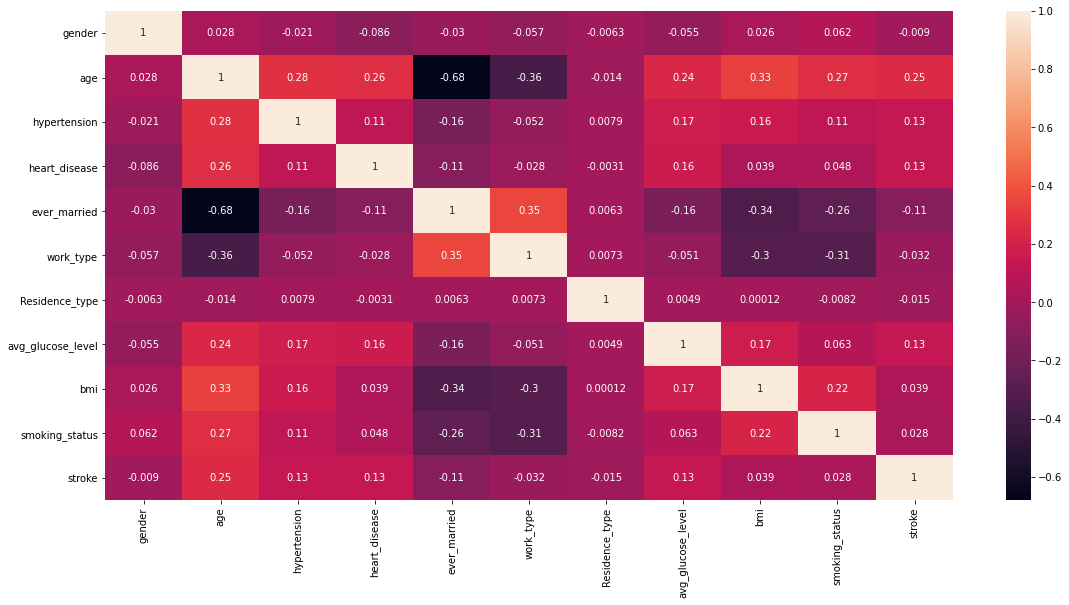

In [10]:
#  correlation chart
cor= df.corr()
cor

plt.figure(figsize=(19,9))
sns.heatmap(cor, annot=True)

In [11]:
data=df.drop(labels='stroke', axis= 'columns')
target= df.stroke

In [12]:
# spliting the data into training and testing

from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(data, target, test_size=0.2)

In [13]:
# building the model

In [14]:
#             RandonForest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=50, criterion='entropy')
rf.fit(x_train,y_train)
rf.score(x_test,y_test)


0.958904109589041

Text(87.0, 0.5, 'Truth')

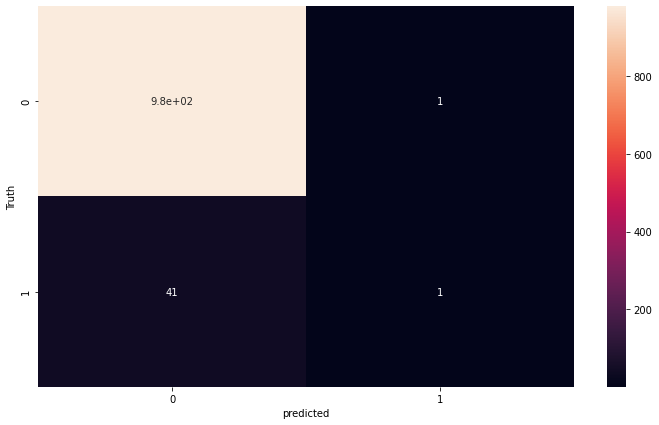

In [15]:
rf_predict=rf.predict(x_test)
from sklearn.metrics import confusion_matrix
cm_rf=confusion_matrix(y_test, rf_predict)
plt.figure(figsize=(12,7))
sns.heatmap(cm_rf, annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')

In [16]:
#             Decision tree
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(criterion='entropy', splitter='random')
tree.fit(x_train,y_train)
tree.score(x_test,y_test)


0.9129158512720157

Text(87.0, 0.5, 'Truth')

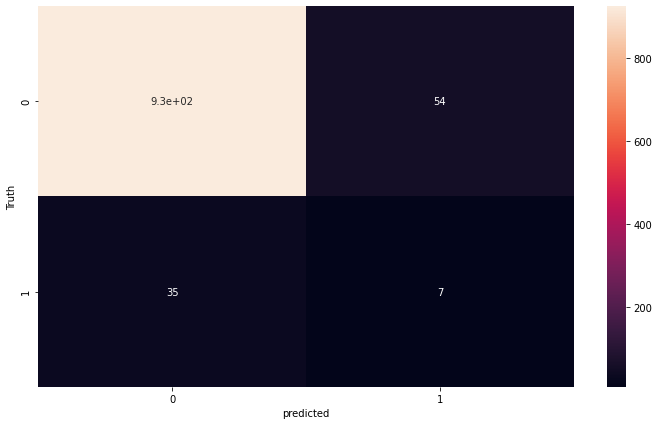

In [17]:
tree_predict=tree.predict(x_test)
from sklearn.metrics import confusion_matrix
cm_tree=confusion_matrix(y_test, tree_predict)
plt.figure(figsize=(12,7))
sns.heatmap(cm_tree, annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')

In [18]:
#             logistic regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(solver='liblinear', C= 1, tol=0.001)
lr.fit(x_train,y_train)
lr.score(x_test,y_test)


0.958904109589041

Text(87.0, 0.5, 'Truth')

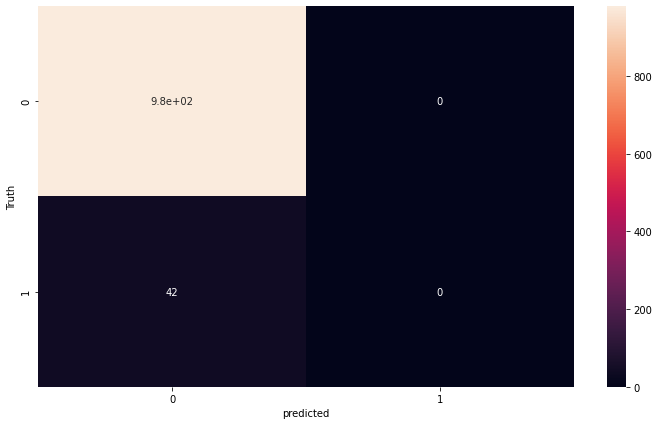

In [19]:
lr_predict=lr.predict(x_test)
from sklearn.metrics import confusion_matrix
cm_lr=confusion_matrix(y_test, lr_predict)
plt.figure(figsize=(12,7))
sns.heatmap(cm_lr, annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')

In [20]:
#             perceptron
from sklearn.linear_model import Perceptron
perc=Perceptron()
perc.fit(x_train,y_train)
perc.score(x_test,y_test)


0.958904109589041

Text(87.0, 0.5, 'Truth')

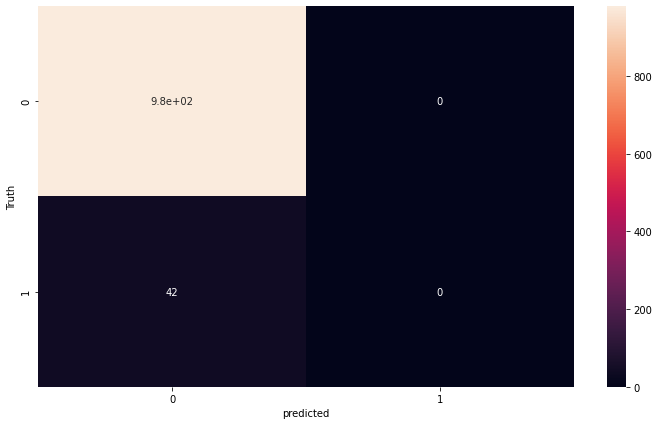

In [21]:
perc_predict=perc.predict(x_test)
from sklearn.metrics import confusion_matrix
cm_perc=confusion_matrix(y_test, perc_predict)
plt.figure(figsize=(12,7))
sns.heatmap(cm_perc, annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')

In [22]:
#             support vector machine
from sklearn.svm import SVC
svm=SVC(C=10,kernel='linear', gamma='auto')
svm.fit(x_train,y_train)
svm.score(x_test,y_test)


0.958904109589041

Text(87.0, 0.5, 'Truth')

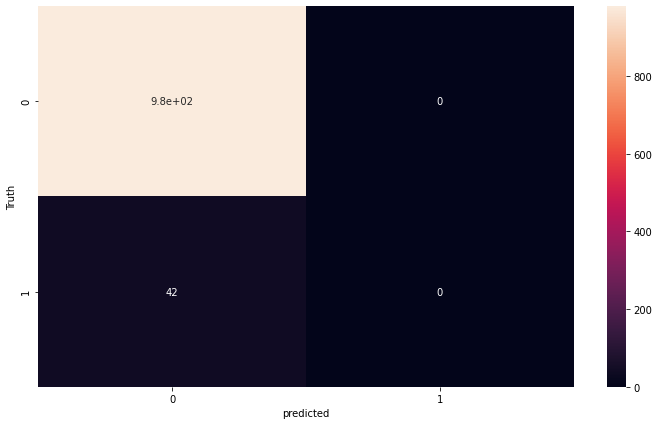

In [23]:
svm_predict=svm.predict(x_test)
from sklearn.metrics import confusion_matrix
cm_svm=confusion_matrix(y_test, svm_predict)
plt.figure(figsize=(12,7))
sns.heatmap(cm_svm, annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')

In [24]:
#             Naive bayes
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
nb.score(x_test,y_test)


0.8718199608610567

Text(87.0, 0.5, 'Truth')

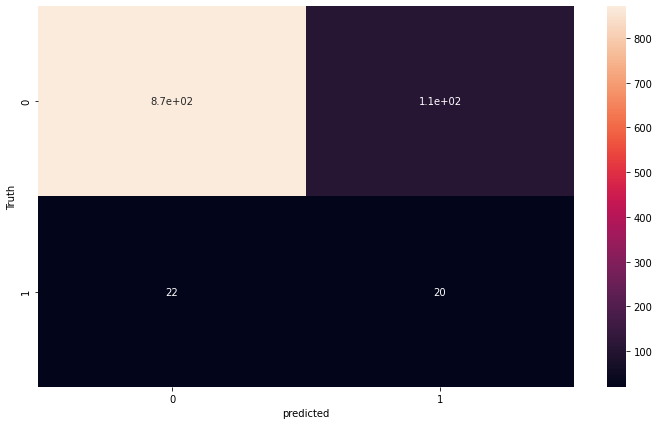

In [25]:
nb_predict=nb.predict(x_test)
from sklearn.metrics import confusion_matrix
cm_nb=confusion_matrix(y_test, nb_predict)
plt.figure(figsize=(12,7))
sns.heatmap(cm_nb, annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')

In [26]:
#             K nearest neighbore
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=10, algorithm='ball_tree')
knn.fit(x_train,y_train)
knn.score(x_test,y_test)


0.958904109589041

Text(87.0, 0.5, 'Truth')

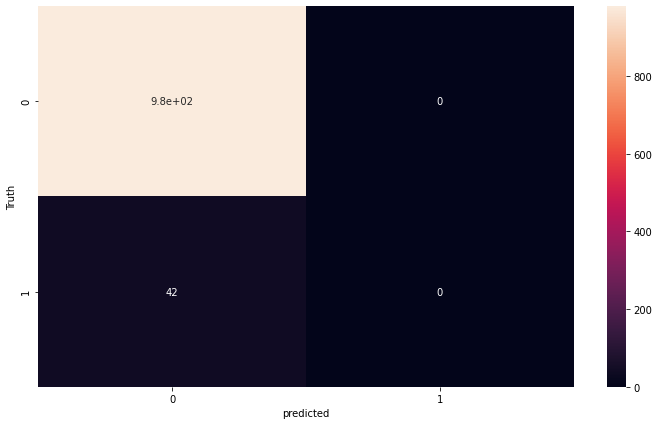

In [27]:
knn_predict=knn.predict(x_test)
from sklearn.metrics import confusion_matrix
cm_knn=confusion_matrix(y_test, knn_predict)
plt.figure(figsize=(12,7))
sns.heatmap(cm_knn, annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')

In [28]:
#      Model evaluation

Text(0, 0.5, 'model scores')

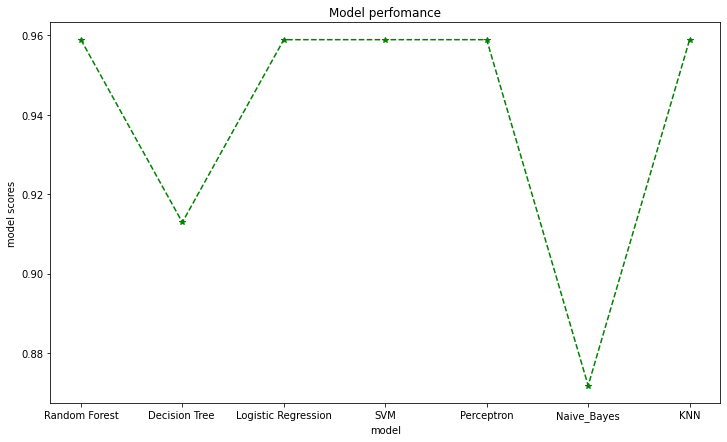

In [29]:
# checking the best performing models
model_X=['Random Forest','Decision Tree ','Logistic Regression','SVM','Perceptron','Naive_Bayes','KNN']
model_Y=[rf.score(x_test,y_test),tree.score(x_test,y_test),lr.score(x_test,y_test),svm.score(x_test,y_test),perc.score(x_test,y_test),nb.score(x_test,y_test),knn.score(x_test,y_test)]
plt.figure(figsize=(12,7))
plt.plot(model_X, model_Y, color='green',linestyle='dashed', marker='*')
plt.title('Model perfomance')
plt.xlabel('model')
plt.ylabel('model scores')

In [30]:
model_params={
    'svm':{
        'model':SVC(gamma='auto'),
        'params':{
        'C':[1,10,20],
        'kernel':['rbf','linear']
         }
    },
    'random_forest':{
        'model':RandomForestClassifier(),
        'params':{
            'n_estimators':[1,5,10]
        }
    },
    'logistic_regression':{
        'model':LogisticRegression(solver='liblinear',multi_class='auto'),
        'params':{
            'C':[1,5,10]
        }
    },
    'decision_tree':{
        'model':DecisionTreeClassifier(),
        'params':{
            'criterion':['gini','entropy','mse', 'friedman_mse'],
            'splitter':['best','random']
        }
        
    },
    'K_Nearest_Neighbor':{
        'model':KNeighborsClassifier(),
        'params':{
            'n_neighbors':[1,10,20,40,50],
            'algorithm':['auto', 'ball_tree']
        }
    },
    'perceptron':{
        'model':Perceptron(),
        'params':{
            'penalty' : ['l2','l1','elasticnet'],
            'validation_fraction':[0,0.5,1],
            'tol': [1e-3]
            
        }
    }
        
}

In [ ]:
scores=[]
for model_name,mp in model_params.items():
    clf= GridSearchCV(mp['model'],mp['params'],cv=3,return_train_score=False)
    clf.fit(data,target)
    scores.append({
        'model':model_name,
        'best_score':clf.best_score_,
        'best_params':clf.best_params_
    })

In [ ]:
df=pd.DataFrame(scores,columns=['model','best_score','best_params'])
df